In [1]:
!mkdir ../lookalikeceleb/

mkdir: cannot create directory ‘../lookalikeceleb/’: File exists


In [2]:
import face_recognition

In [3]:
import os

In [4]:
import numpy as np

In [5]:
from IPython.display import Image

In [6]:
#  "embedding" refers to a learned 
# representation of data in a lower-dimensional 
# space. It involves mapping high-dimensional data,
# such as images or text, into a lower-dimensional
# space while preserving meaningful relationships 
# or patterns.



In [7]:
def load_images(known_images_dir):
    known_encodings = []
    known_images = []

    for file in os.listdir(known_images_dir):
        #fsdecode function decode the file into filename
        filename = os.fsdecode(file)
        image = face_recognition.load_image_file(os.path.join(known_images_dir, filename))

        enc = face_recognition.face_encodings(image)
        if len(enc) > 0:
            known_encodings.append(enc[0])
            known_images.append(filename)

    return (known_encodings, known_images)

In [8]:
def calculate_face_distance(known_encodings, unknown_img_path, cutoff=0.5, num_results=4):
    image_to_test = face_recognition.load_image_file(unknown_img_path)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

    face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)
    return (unknown_img_path, known_images[face_distances.argmin()])

In [9]:
known_encodings, known_images = load_images("/cxldata/projects/lookalikeceleb/images")

/usr/local/anaconda/lib/python3.6/site-packages/PIL/Image.py:976: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


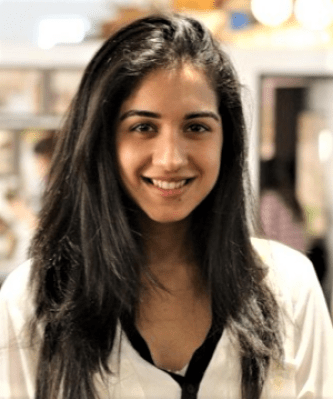

In [10]:
original_image = "../lookalikeceleb/myimage.jpg"
Image(filename=original_image)

In [11]:
matching_image = calculate_face_distance(known_encodings, original_image)[1]
print(matching_image)
# type(matching_image)


Sharmila Tagore.jpg


Hey, Radhika Merchant is look like Sharmila Tagore celebrity!


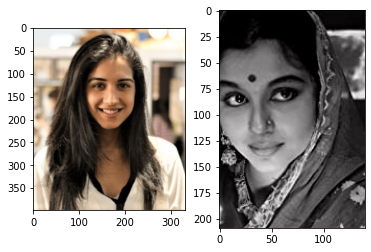

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# read images
img_1 = mpimg.imread(original_image)
img_2 = mpimg.imread('/cxldata/projects/lookalikeceleb/images/' + matching_image)

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_1);
ax[1].imshow(img_2);

print('Hey, Radhika Merchant is look like ' + os.path.splitext(matching_image)[0] + ' celebrity!')